In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import lasio as las
import numpy as np

In [3]:
well=las.read("S-KNGM-GM-3_T_133820_0.las")
Well=well.df()
Well=Well.dropna()
Well.DT=Well.DT/0.3048
Well.RHOB=Well.RHOB

In [4]:
fig,axes=plt.subplots(nrows=1,ncols=9,figsize=(30,20),dpi=500)
axes[0].plot(Well.CALI,Well.index,'red'); 
axes[0].set_xlabel("CALI");
axes[1].plot(Well.SP,Well.index,'cyan');  
axes[1].set_xlabel("SP");
axes[2].plot(Well.DT,Well.index,'yellow'); 
axes[2].set_xlabel("DT");
axes[3].plot(Well.GR,Well.index,'blue');  
axes[3].set_xlabel("GR");
axes[4].semilogx(Well.LLD,Well.index,'orange');  
axes[4].set_xlabel("LLD");
axes[5].semilogx(Well.LLS,Well.index,'green');  
axes[5].set_xlabel("LLS");
axes[6].semilogx(Well.MSFL,Well.index,'magenta'); 
axes[6].set_xlabel("MSFL");
axes[7].plot(Well.NPHI,Well.index,'grey');  
axes[7].set_xlabel("NPHI");
axes[8].plot(Well.RHOB,Well.index,'pink');  
axes[8].set_xlabel("RHOB");
for ax in axes:
    ax.invert_yaxis()
plt.tight_layout    

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

Text(0, 0.5, 'Depth(m)')

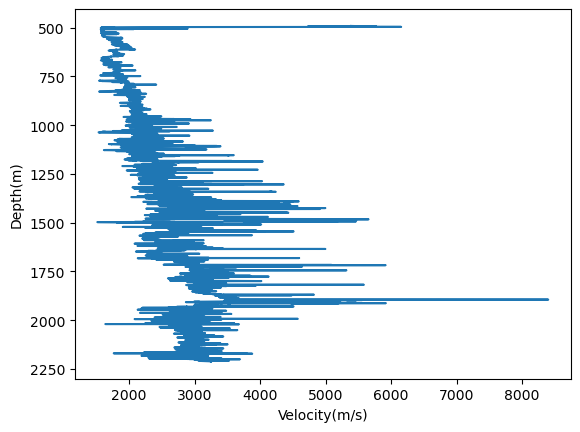

In [5]:
Well["vel"]=(1000000)/(Well.DT)
plt.plot(Well.vel,Well.index)
plt.gca().invert_yaxis()
plt.xlabel("Velocity(m/s)")
plt.ylabel("Depth(m)")

Text(0, 0.5, 'Depth')

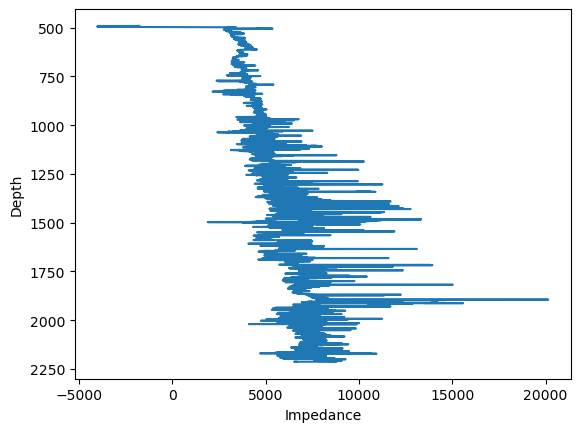

In [6]:
Well["Acoustic"]=Well.vel*Well.RHOB
plt.plot(Well.Acoustic,Well.index)
plt.gca().invert_yaxis()
plt.xlabel("Impedance")
plt.ylabel("Depth")

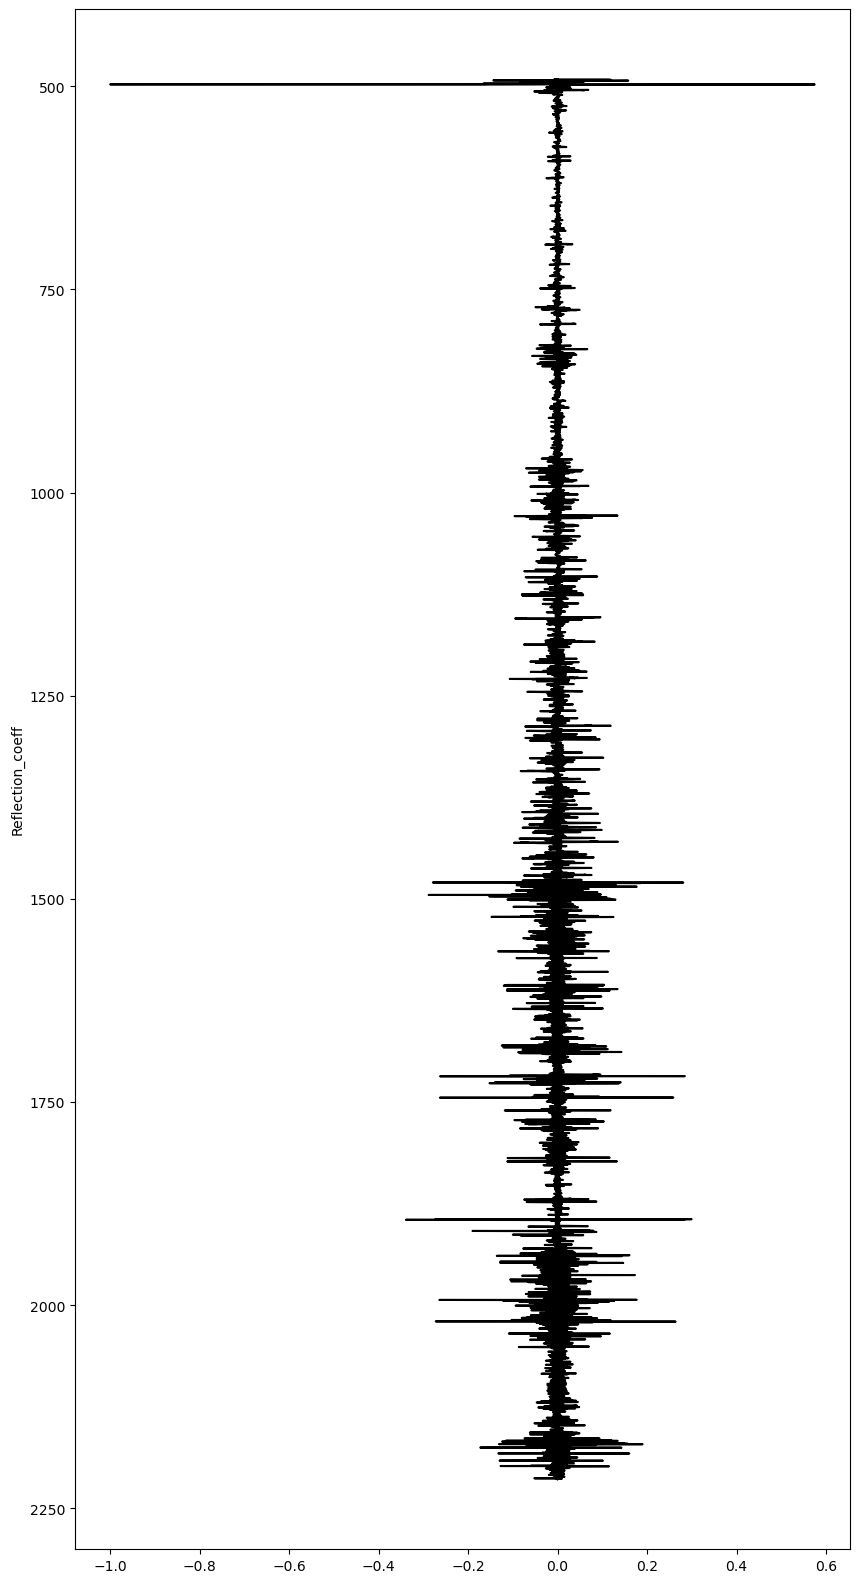

In [7]:
acoustic=Well.Acoustic.to_numpy()
reflection=np.zeros(len(acoustic))
for i in range(len(acoustic)-1):
    reflection[i+1]=(acoustic[i+1]-acoustic[i])/(acoustic[i+1]+acoustic[i])
index=np.argmin(reflection)
reflection[index]=-1
plt.figure(figsize=(10,20))
plt.plot(reflection,Well.index,color='black')
plt.ylabel("Reflection_coeff")
plt.gca().invert_yaxis()

In [8]:
Well.describe()

,CALI,DT,GR,LLD,LLS,MSFL,NPHI,RHOB,SP,vel,Acoustic
count,11305.000000,11305.000000,11305.000000,11305.000000,11305.000000,11305.000000,11305.000000,11305.000000,11305.000000,11305.000000,11305.000000
mean,11.736768,417.083668,57.568151,4.560226,1.625718,3.340497,0.435561,2.218182,-15.977489,2539.812521,5685.503043
std,3.027170,98.112863,16.245891,272.205565,2.500105,31.119333,0.105673,0.255437,117.017816,638.014160,1823.951827
min,3.119300,119.090551,14.963400,0.701500,0.468000,0.547100,0.022300,-0.827000,-186.165400,1515.122142,-4018.318545
25%,8.555800,338.144357,47.580400,1.213700,1.130100,0.861800,0.380800,2.107100,-142.569900,2052.627538,4315.479003
50%,11.822500,405.587270,60.047600,1.376600,1.219900,1.350800,0.456600,2.197800,62.478800,2465.560616,5445.869141
75%,13.771100,487.180446,69.099800,2.026600,1.717100,2.607400,0.510300,2.370100,90.665900,2957.316837,6993.619651
max,22.263300,660.012795,156.428900,28876.363300,95.222500,1689.817400,0.840400,2.871100,149.365300,8396.971801,20144.335350


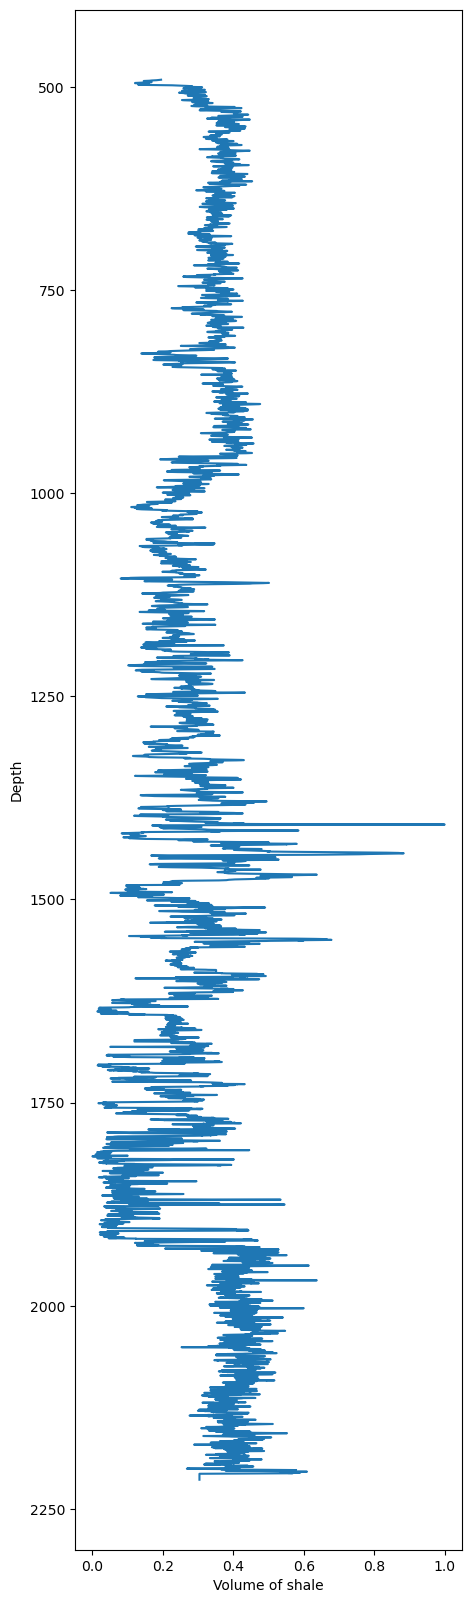

In [9]:
GR_max=156.428900
GR_min=14.963400
V_sh=(Well.GR-GR_min)/(GR_max-GR_min)
plt.figure(figsize=(5,20))
plt.plot(V_sh,Well.index)
plt.gca().invert_yaxis()
plt.xlabel("Volume of shale")
plt.ylabel("Depth")

plt.show()

In [10]:
# finding the porosity
Well["Porosity"]=(2.71-Well.RHOB)/(2.71-1)

Text(0.5, 0, 'Volume of Shale')

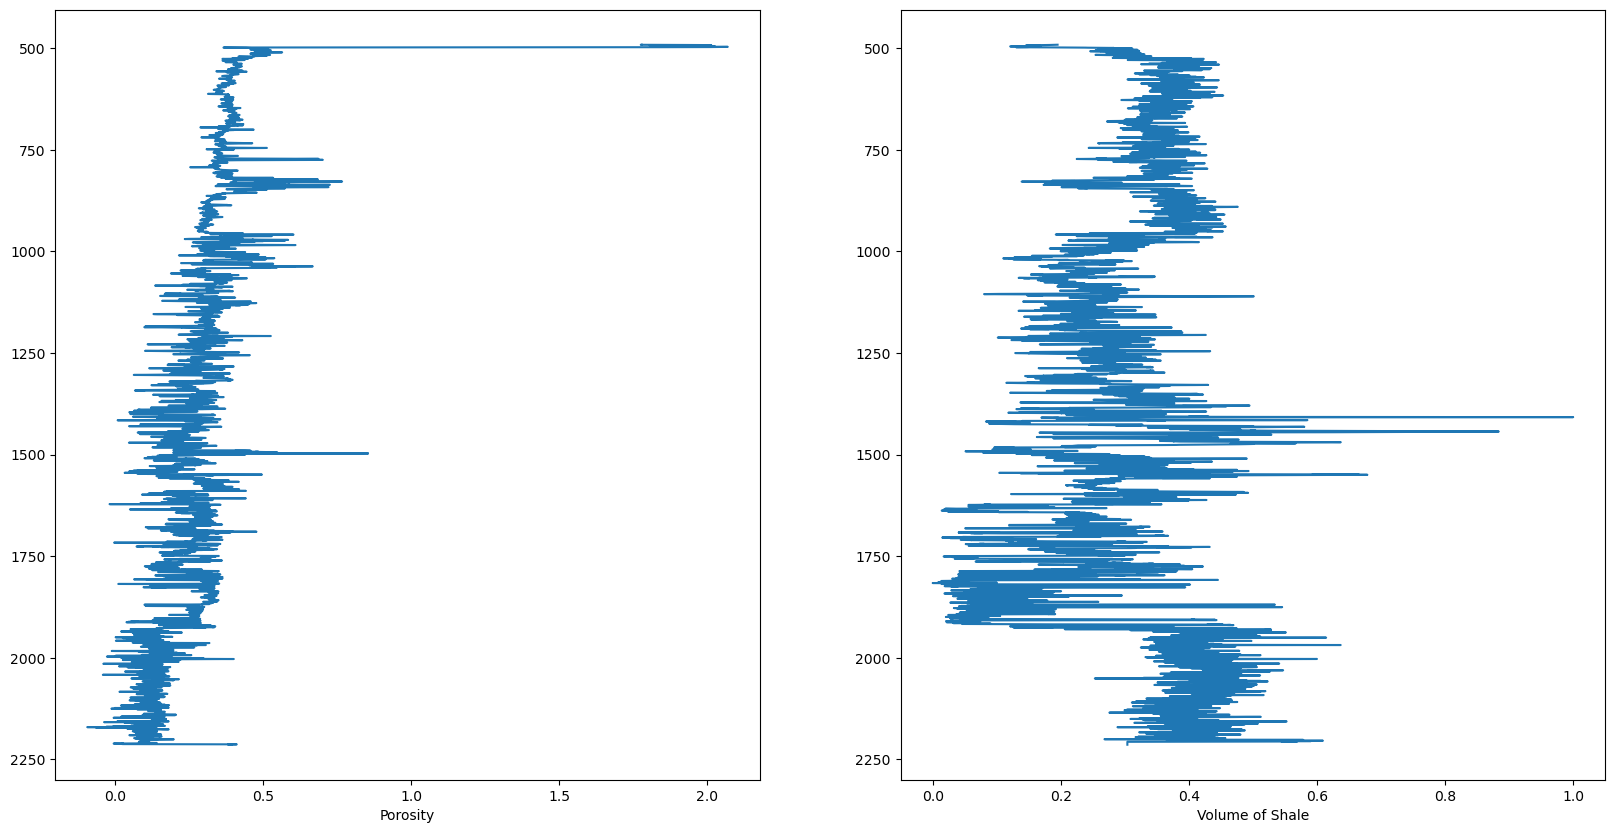

In [11]:
fi=g,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,10))
axes[0].plot(Well.Porosity,Well.index)
axes[1].plot(V_sh,Well.index)
for ax in axes:
    ax.invert_yaxis()
    
axes[0].set_xlabel("Porosity")
axes[1].set_xlabel("Volume of Shale")


In [12]:
Well.Porosity.describe()

count    11305.000000
mean         0.287613
std          0.149378
min         -0.094211
25%          0.198772
50%          0.299532
75%          0.352573
max          2.068421
Name: Porosity, dtype: float64

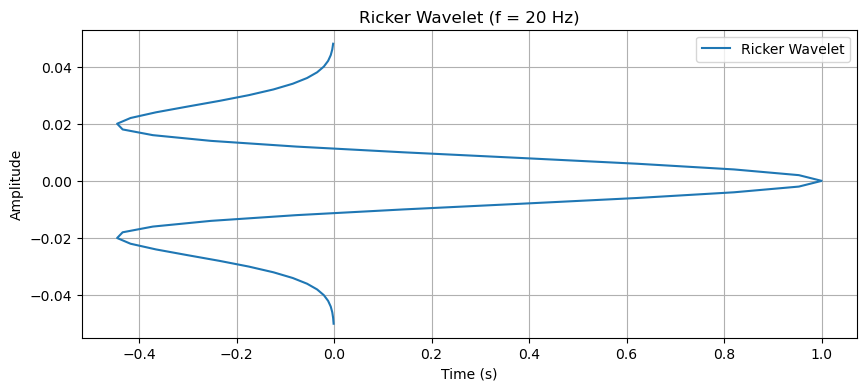

In [13]:
# define function of ricker wavelet
def ricker(f, length, dt):
    t0 = np.arange(-length/2, (length-dt)/2, dt)
    y = (1.0 - 2.0*(np.pi**2)*(f**2)*(t0**2)) * np.exp(-(np.pi**2)*(f**2)*(t0**2))
    return t0, y

f=20            #wavelet frequency
length=0.1    #Wavelet vector length
dt=0.002           # Sampling prefer to use smiliar to resampled AI
t0, w = ricker (f, length, dt) # ricker wavelet 

# Plot the Ricker wavelet
plt.figure(figsize=(10, 4))
plt.plot(w,t0, label='Ricker Wavelet')
plt.title(f'Ricker Wavelet (f = {f} Hz)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.show()

In [14]:
#first replace NaN values with zero
dt_iterval = np.nan_to_num(Well.DT) * 0.1524 / 1e6
t_cum = np.cumsum(dt_iterval) * 2
Well["TWT"] = t_cum

dt = 0.001 #sampleing interval
t_max = 3.0 # max time to create time vector
t = np.arange(0, t_max, dt)
AI = np.interp(x=t, xp = Well.TWT, fp = Well.Acoustic) #resampling

# again Rc calulation but in resampled time domain
RC = []
for i in range(len(AI)-1):
    RC.append((AI[i+1]-AI[i])/(AI[i]+AI[i+1]))
# to adjust vector size copy the last element to the tail
RC.append(RC[-1])

In [15]:
seismic_trace = np.convolve( w,RC,mode="same")

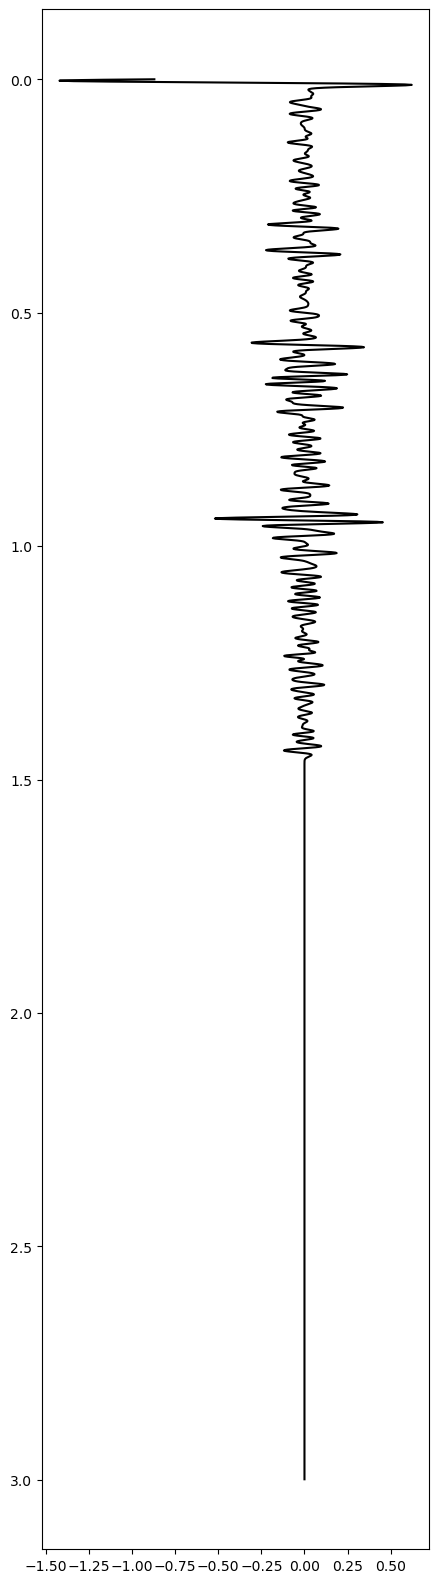

In [16]:
plt.figure(figsize=(5,20))
plt.plot(seismic_trace,t, label='Seismic Trace', color='black')
plt.gca().invert_yaxis()

In [17]:
# Classify lithology based on V_sh
lithology = np.where(V_sh < 0.3, 'Sandstone', 'Shale')
depth_intervals = Well.index[(V_sh < 0.3)]

# Print the depth range for sandstone and shale
sandstone_depths = Well.index[V_sh < 0.3]
shale_depths = Well.index[V_sh >= 0.3]

print("Sandstone depth ranges:")
print(sandstone_depths)

print("Shale depth ranges:")
print(shale_depths)

plt.show()

Sandstone depth ranges:
Float64Index([  491.333,  491.4854,  491.6378,  491.7902,  491.9426,   492.095,
               492.2474,  492.3998,  492.5522,  492.7046,
              ...
              2134.6623, 2134.8147,  2134.967, 2135.1194, 2135.2717, 2170.9333,
              2200.1943, 2200.3467,  2200.499, 2200.6514],
             dtype='float64', name='BOREHOLE-DEPTH', length=5054)
Shale depth ranges:
Float64Index([  500.477,  500.6294,  500.7818,  502.6106,   502.763,   503.525,
               503.6774,  503.8298,  503.9822,  504.1346,
              ...
              2212.6909, 2212.8435, 2212.9958, 2213.1482, 2213.3005, 2213.4531,
              2213.6055, 2213.7578, 2213.9101, 2214.0627],
             dtype='float64', name='BOREHOLE-DEPTH', length=6251)


In [18]:
V_sh

BOREHOLE-DEPTH
491.3330     0.194976
491.4854     0.191750
491.6378     0.189108
491.7902     0.187184
491.9426     0.181902
               ...   
2213.4531    0.303925
2213.6055    0.303925
2213.7578    0.303925
2213.9101    0.303925
2214.0627    0.303925
Name: GR, Length: 11305, dtype: float64